Oefening Data Scientist 
Geert Vandezande

Doel:
- Supervised Learning toepassen
- EDA uitvoeren op een dataset
- Lineair Regression toepassen op de data

Dataset: 
- More info: see kaggle https://www.kaggle.com/datasets/arifmia/heart-attack-risk-dataset


Volgorde van activiteiten in deze notebook: (cfr Datacamp "preparing data for modelling)
- data inlezen
- data bekijken, visueel en numerisch
- missing data oplossen 
- incorrect types controleren
- Numerische waarde standardizeren
- Categorische varaiabelen processen
- Feature engineering
- select features for modelling






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

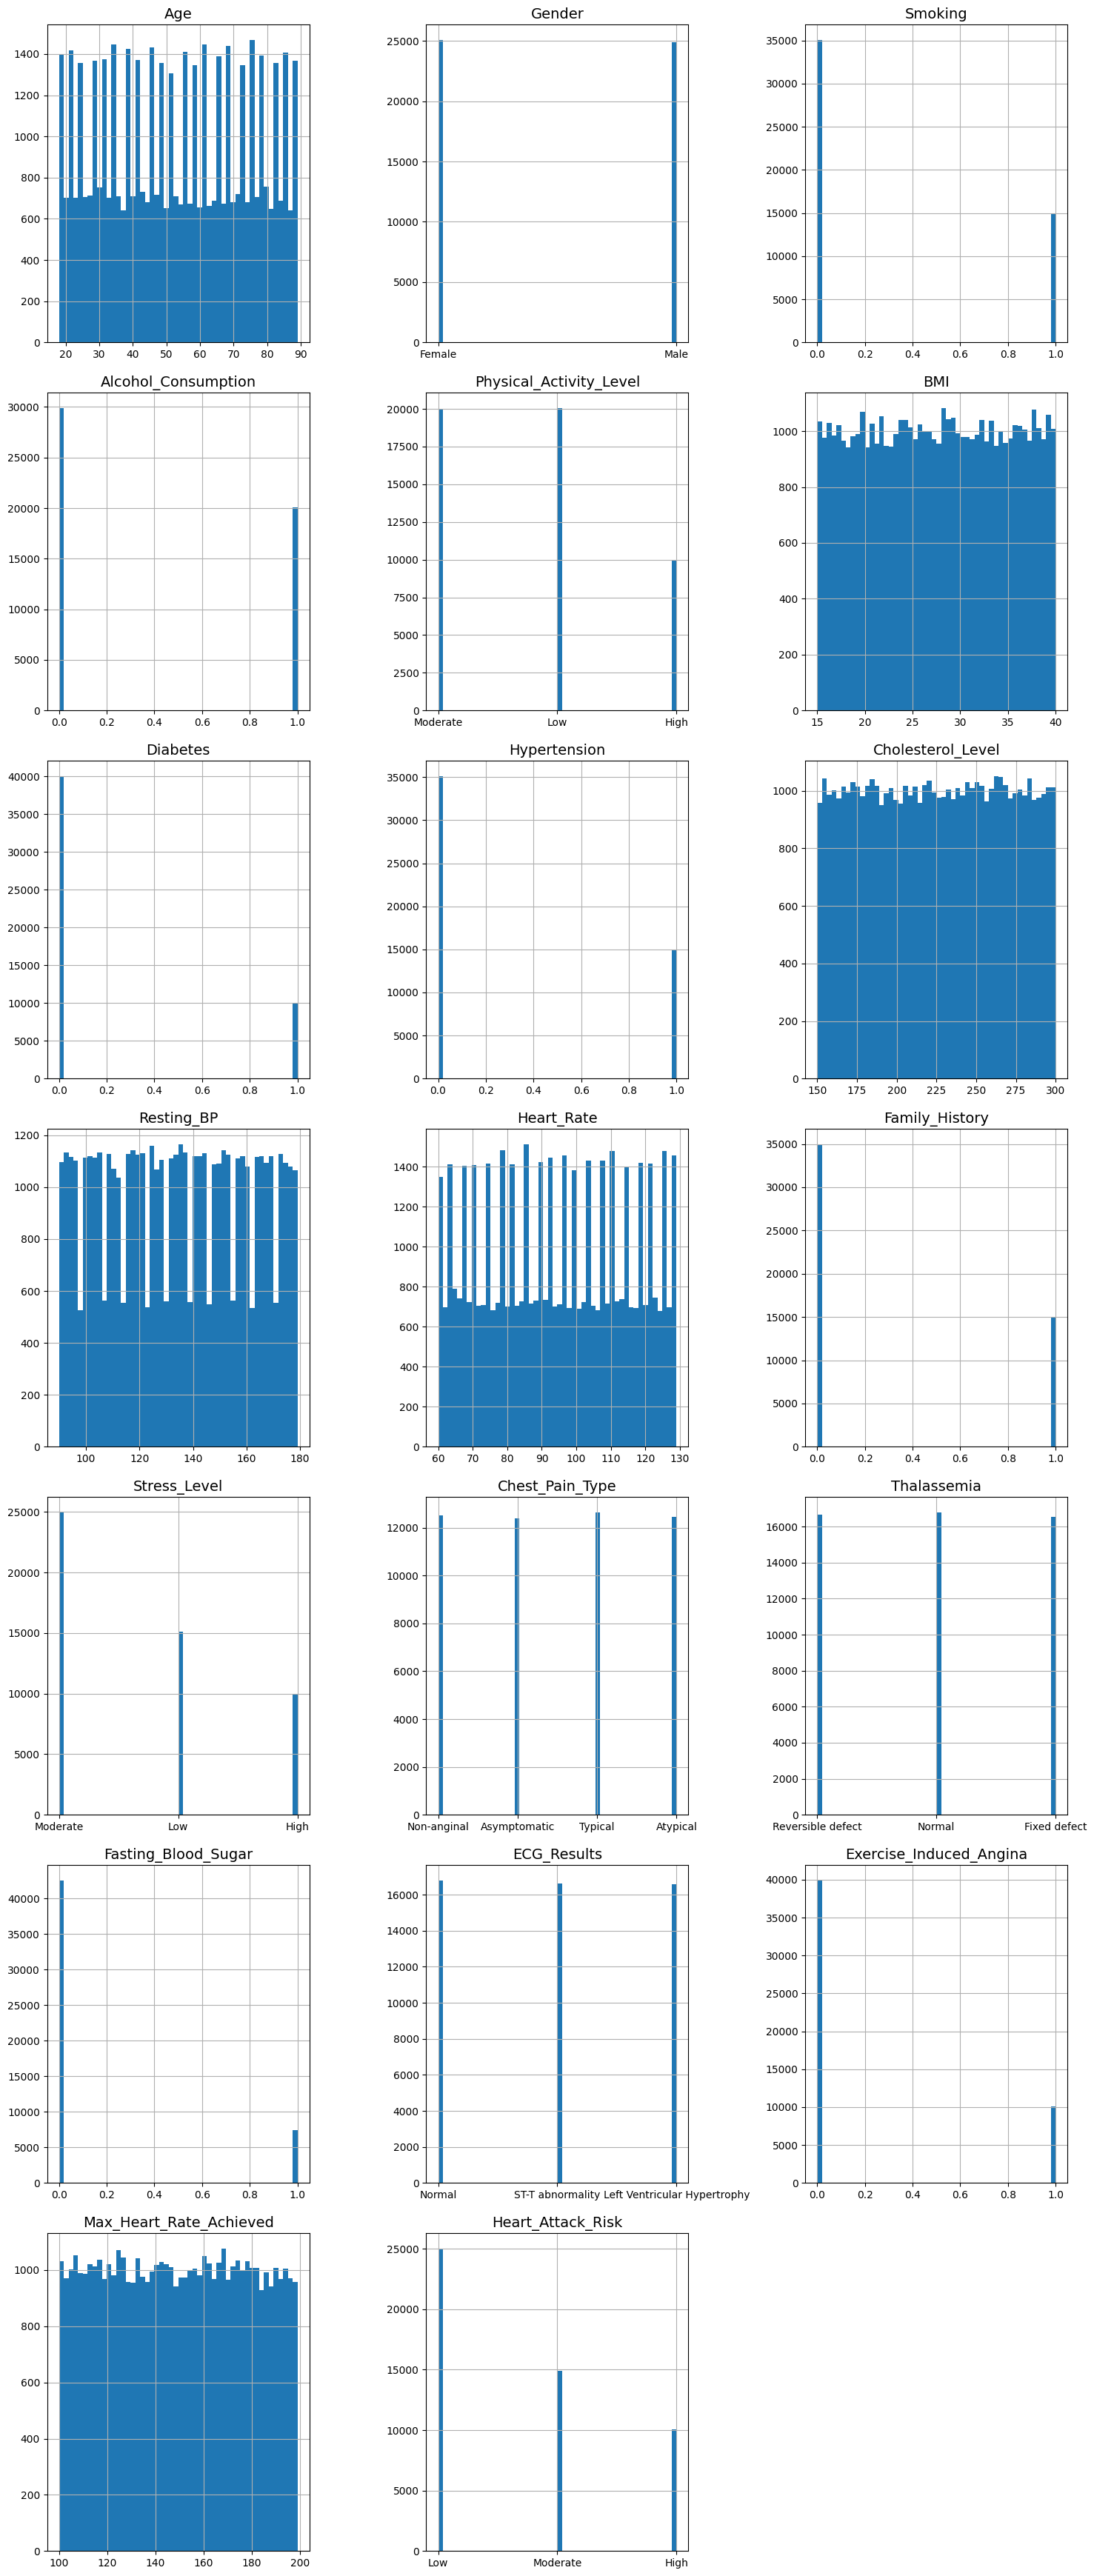

In [3]:
# importeren van modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_set_filename = "data\\heart_attack_risk_dataset.csv"

df_raw = pd.read_csv(data_set_filename)

df_raw.info()
df_raw.describe()

		# extra code – the next 5 lines define the default font sizes
# plt.rc('font', size=14)
# plt.rc('axes', labelsize=14, titlesize=14)
# plt.rc('legend', fontsize=14)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)
# df_raw.hist(bins=50, figsize=(12, 8))
# save_fig("attribute_histogram_plots")  # extra code
# plt.show()


num_columns = 3
num_plots = len(df_raw.columns)
num_rows = (num_plots + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()
for i, column in enumerate(df_raw.columns):
    df_raw[column].hist(bins=50, ax=axes[i])
    axes[i].set_title(column)
# Hide any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()




In [5]:
# check op nulwaarden

null_rows_idx = df_raw.isnull().any(axis=1)
print(null_rows_idx)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [ ]:
# correlatie in een meatmap tonen 